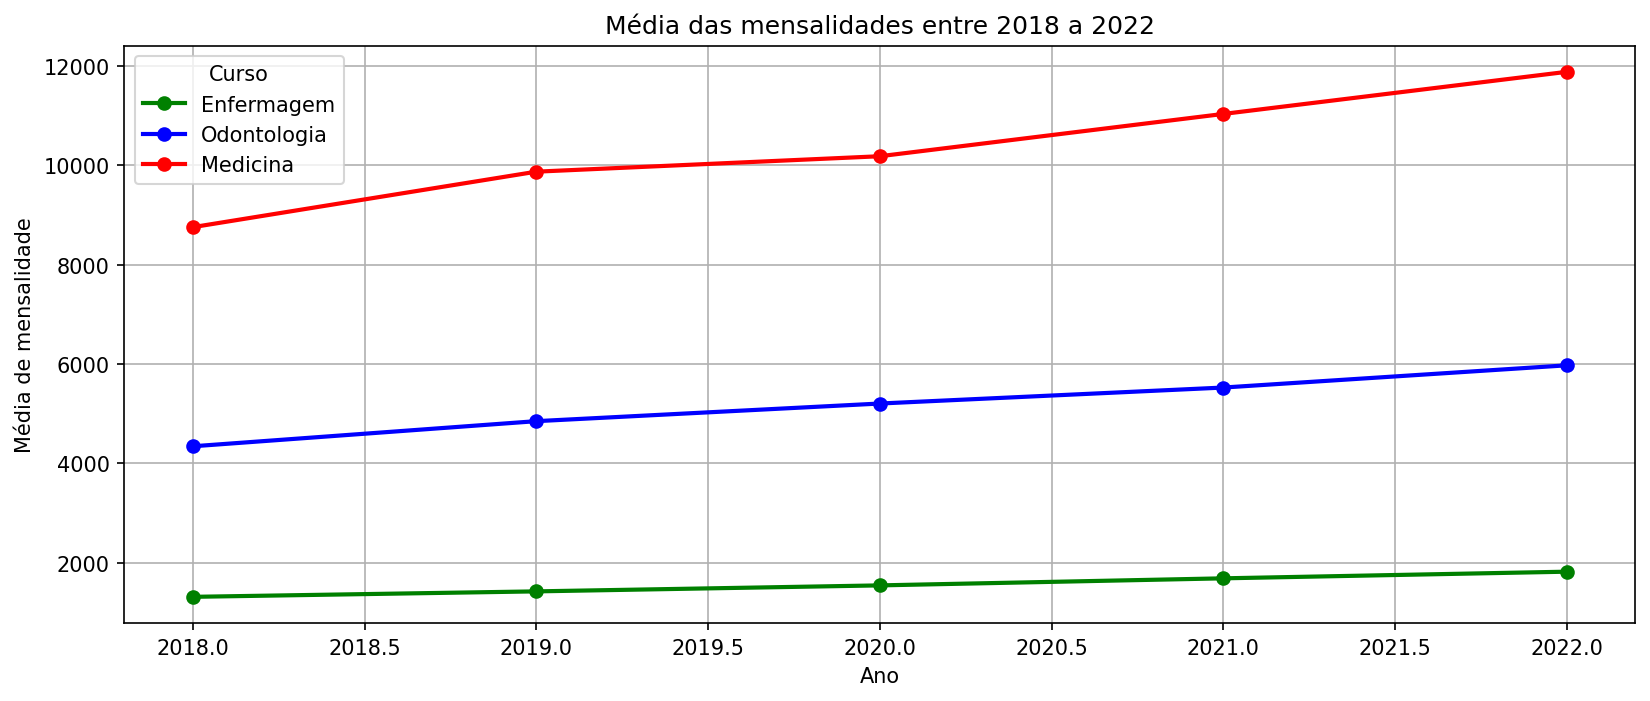

In [32]:
# import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Carregando os dados do arquivo CSV
dados_faculdade = pd.read_csv('./cursos.csv')
# Convertendo a coluna data para o tipo datetime
dados_faculdade['Data'] = pd.to_datetime(dados_faculdade['Data'])
# Criando uma nova coluna "Ano", que pode ser usada para filtrar os dados posteriomente
dados_faculdade['Ano'] = dados_faculdade['Data'].dt.year
# Filtrar
cursos_noturnos = dados_faculdade[(dados_faculdade['Turno'] == 'Noturno') & (dados_faculdade['Ano'].isin([2018,2019,2020,2021,2022]))]
# Realizando o agrupamento por curso e ano e obtendo a média da mensalidade
dados_agrupados = cursos_noturnos.groupby(['Curso','Ano']).agg({'Mensalidade':'mean'}).reset_index()
# Pivotando os resultados para que o ano se torne o índice(eixo X), a coluna "Curso" se torne as colunas que podem ser acessadas e a "Mensalidade" se torne o eixo Y
dados_pivotados = dados_agrupados.pivot_table(index='Ano',columns='Curso',values='Mensalidade')

# Criando as especificações do gráfico
plt.figure(figsize=(13,5),dpi=150)
# Selecionando as colunas e definições de exibição
plt.plot(dados_pivotados.index,  dados_pivotados['Enfermagem'], label='Enfermagem', marker='o', linestyle='solid', linewidth=2,color='green')
plt.plot(dados_pivotados.index,  dados_pivotados['Odontologia'], label='Odontologia', marker='o', linestyle='solid', linewidth=2,color='blue')
plt.plot(dados_pivotados.index,  dados_pivotados['Medicina'], label='Medicina', marker='o', linestyle='solid', linewidth=2,color='red')
# Lengendas
plt.title('Média das mensalidades entre 2018 a 2022')
plt.xlabel('Ano')
plt.ylabel('Média de mensalidade')
plt.legend(title='Curso')
# Grid
plt.grid(True)
# Exibir o gráfico
plt.show()

In [29]:
# import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Carregando os dados do arquivo CSV
dados_faculdade = pd.read_csv('./cursos.csv')
dados_faculdade

,ID,Faculdade,Curso,Duracao_Anos,Mensalidade,Turno,Data
0,1,Faculdade Delta,Arquitetura,5,1853.08,Vespertino,2021-08-26
1,2,Centro Universitário Theta,Direito,5,1062.15,Matutino,2015-02-03
2,3,Escola Superior Epsilon,Arquitetura,5,1307.86,Vespertino,2014-10-20
3,4,Universidade Alpha,Psicologia,5,1019.50,Matutino,2018-01-19
4,5,Universidade Zeta,Direito,5,1156.71,Matutino,2015-08-21
...,...,...,...,...,...,...,...
1095,1096,Escola Superior Kappa,Medicina,6,6061.28,Vespertino,2013-01-20
1096,1097,Instituto Eta de Ciências,Enfermagem,5,1373.69,Matutino,2018-12-29
1097,1098,Escola Superior Epsilon,Odontologia,5,5024.86,Noturno,2020-11-20
1098,1099,Escola Superior Epsilon,Enfermagem,5,1530.52,Noturno,2020-07-27
